In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv("train.csv")
df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [16]:
df = df.ix[1:3000, :]
df

id                                       comment_text  \
1     000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2     000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3     0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4     0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5     00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6     0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7     00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8     00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9     00040093b2687caa  alignment on this subject and which are contra...   
10    0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   
11    00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...   
12    0005c987bdfc9d4b  Hey... what is it..\n@ | talk .\nWhat is it......   
13    0006f16e4e9f292e  Before you start throwing accusations and warn...   
14    00070ef96486d6f9  Oh, and the girl above started her arguments w...   
15    00078f8ce7eb276d  "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...   
16    0007e25b2121310b  Bye! \n\nDon't look, come or think of comming ...   
17    000897889268bc93   REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski   
18    0009801bd85e5806  The Mitsurugi point made no sense - why not ar...   
19    0009eaea3325de8c  Don't mean to bother you \n\nI see that you're...   
20    000b08c464718505  "\n\n Regarding your recent edits \n\nOnce aga...   
21    000bfd0867774845  "\nGood to know. About me, yeah, I'm studying ...   
22    000c0dfd995809fa  "\n\n Snowflakes are NOT always symmetrical! \...   
23    000c6a3f0cd3ba8e  "\n\n The Signpost: 24 September 2012 \n\n Rea...   
24    000cfee90f50d471  "\n\nRe-considering 1st paragraph edit?\nI don...   
25    000eefc67a2c930f  Radial symmetry \n\nSeveral now extinct lineag...   
26    000f35deef84dc4a  There's no need to apologize. A Wikipedia arti...   
27    000ffab30195c5e1  Yes, because the mother of the child in the ca...   
28    0010307a3a50a353  "\nOk. But it will take a bit of work but I ca...   
29    0010833a96e1f886  "== A barnstar for you! ==\n\n  The Real Life ...   
30    0011cc71398479c4  How could I post before the block expires?  Th...   
...                ...                                                ...   
2971  0802c383c20261e5  i am reading it, and have it watchlisted, but ...   
2972  080349a34dea3a89  In addition, the RFC has expired.\n\nOn the ya...   
2973  0803dfe4c5e84b27               No worries I see this has been done.   
2974  080461bc792e4b5e  You are clearly violating Wikipedia policy by ...   
2975  08056e2009580910  "\n\nFair use rationale for Image:TranquilityP...   
2976  0805d5ee74295f85  I appreciate the invite\nI appreciate the invi...   
2977  0806213e20ce5ec8          REDIRECT Talk:T.O.S. (Terminate On Sight)   
2978  08068025d751f319                Karnan \n\nThanks for your welcome.   
2979  0806d74436c0e7eb  Julien aklei \n\nFisherQueen, you flagged the ...   
2980  08083a9c2ea697fe  You do not know that we have two different cat...   
2981  080935ecbde36c4e                                cocksucking bastard   
2982  080996a82395a4c8  "That widescreen image of the tear is too wide...   
2983  0809d66739273760  Johann Hari pic \n\nHi JacoPlame - The picture...   
2984  080a2b409c3a9d59  "\n\nPut Me Out single\nHello, how are you? I ...   
2985  080d0c77d6af9b03  Not this again.  This is the sixth time the ar...   
2986  080db6b8374b4746  You're a real problem, Radiopathy. You would d...   
2987  080dde8a1b0287aa  It doesn't sound like there is a copyright iss...   
2988  080dfb9d0cbd37d1  "\n\n Mujaddid \n\nYou keep listing Ashraf Ali...   
2989  080ed7ec244614c9  . I should become a detective for figuring all...   
2990  080efc3279ac4bb4  Apology? \n\nYou never did apologize for your ...   
2991  080f690720

In [25]:
import collections
import random
import time

class WordModel:
    
    def __init__(self, batch_size, dimension_size, learning_rate, vocabulary_size):
        
        self.train_inputs = tf.placeholder(tf.int32, shape = [batch_size])
        self.train_labels = tf.placeholder(tf.int32, shape = [batch_size, 1])
        
        # randomly generated initial value for each word dimension, between -1.0 to 1.0
        embeddings = tf.Variable(tf.random_uniform([vocabulary_size, dimension_size], -1.0, 1.0))
        
        # find train_inputs from embeddings
        embed = tf.nn.embedding_lookup(embeddings, self.train_inputs)
        
        # estimation for not normalized dataset
        self.nce_weights = tf.Variable(tf.truncated_normal([vocabulary_size, dimension_size], stddev = 1.0 / np.sqrt(dimension_size)))
        
        # each node have their own bias
        self.nce_biases = tf.Variable(tf.zeros([vocabulary_size]))
        
        # calculate loss from nce, then calculate mean
        self.loss = tf.reduce_mean(tf.nn.nce_loss(weights = self.nce_weights, biases = self.nce_biases, labels = self.train_labels,
                                                  inputs = embed, num_sampled = batch_size / 2, num_classes = vocabulary_size))
        
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)
        
        # normalize the data by simply reduce sum
        self.norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
        
        # normalizing each embed
        self.normalized_embeddings = embeddings / self.norm

def read_data(filename):

    dataset = pd.read_csv(filename)
    dataset = dataset.ix[1:150, :]
    rows = dataset.shape[0]
    print('there are', rows, 'total rows')
    
    # last column is our target
    label = dataset.ix[:, -1:].values
        
    # get second and third column values
    concated = []
    data = dataset.ix[:, 1].values
    
    for i in range(data.shape[0]):
        string = ""
            
#         for k in range(data.shape[1]):
        string += data[i] + " "
            
        concated.append(string) 
    
    # get all split strings from second column and second last column
    dataset = dataset.ix[:, 1].values
    string = []
    for i in range(dataset.shape[0]):
#         for k in range(dataset.shape[1]):
        string += dataset[i].split()
    
    return string, concated, label, list(set(string))

def build_dataset(words, vocabulary_size):
    count = []
    # extend count
    # sorted decending order of words
    count.extend(collections.Counter(words).most_common(vocabulary_size))

    dictionary = dict()
    for word, _ in count:
        #simply add dictionary of word, used frequently placed top
        dictionary[word] = len(dictionary)

    data = []
    unk_count = 0
    for word in words:
        if word in dictionary:
            index = dictionary[word]

        data.append(index)
    
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return data, dictionary, reverse_dictionary

def generate_batch_skipgram(words, batch_size, num_skips, skip_window):
    data_index = 0
    
    #check batch_size able to convert into number of skip in skip-grams method
    assert batch_size % num_skips == 0
    
    assert num_skips <= 2 * skip_window
    
    # create batch for model input
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1
    
    # a buffer to placed skip-grams sentence
    buffer = collections.deque(maxlen=span)
    
    for i in range(span):
        buffer.append(words[data_index])
        data_index = (data_index + 1) % len(words)
    
    for i in range(batch_size // num_skips):
        target = skip_window
        targets_to_avoid = [skip_window]
        
        for j in range(num_skips):
            
            while target in targets_to_avoid:
                # random a word from the sentence
                # if random word still a word already chosen, simply keep looping
                target = random.randint(0, span - 1)
            
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        
        buffer.append(words[data_index])
        data_index = (data_index + 1) % len(words)
    
    data_index = (data_index + len(words) - span) % len(words)
    return batch, labels

def generatevector(dimension, batch_size, skip_size, skip_window, num_skips, iteration, words_real):
    
    print('data size: ', len(words_real))
    data, dictionary, reverse_dictionary = build_dataset(words_real, len(words_real))
    
    sess = tf.InteractiveSession()
    print('Creating Word2Vec model.')
    
    model = WordModel(batch_size, dimension, 0.01, len(dictionary))
    sess.run(tf.global_variables_initializer())
    
    last_time = time.time()
    
    for step in range(iteration):
        new_time = time.time()
        batch_inputs, batch_labels = generate_batch_skipgram(data, batch_size, num_skips, skip_window)
        feed_dict = {model.train_inputs: batch_inputs, model.train_labels: batch_labels}
        
        _, loss = sess.run([model.optimizer, model.loss], feed_dict=feed_dict)
        
        if ((step + 1) % 1000) == 0:
            print('epoch: ', step + 1, ', loss: ', loss, ', speed: ', time.time() - new_time)
    
    tf.reset_default_graph()       
    return dictionary, reverse_dictionary, model.normalized_embeddings.eval()

In [26]:
dimension = 32
skip_size = 8
skip_window = 1
num_skips = 2
iteration_train_vectors = 5000

num_layers = 2
size_layer = 256
learning_rate = 0.001
epoch = 10
batch = 30

In [27]:
string, data, label, vocab = read_data('train.csv')
label_encode = LabelEncoder().fit_transform(label)
dictionary, reverse_dictionary, vectors = generatevector(dimension, dimension, skip_size, skip_window, num_skips, iteration_train_vectors, string)

there are 150 total rows
data size:  11000
Creating Word2Vec model.


c:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


epoch:  1000 , loss:  0.04490524 , speed:  0.0010030269622802734
epoch:  2000 , loss:  0.042897373 , speed:  0.0010027885437011719
epoch:  3000 , loss:  0.029340293 , speed:  0.0010023117065429688
epoch:  4000 , loss:  0.045754425 , speed:  0.0010023117065429688
epoch:  5000 , loss:  0.010168018 , speed:  0.0010025501251220703


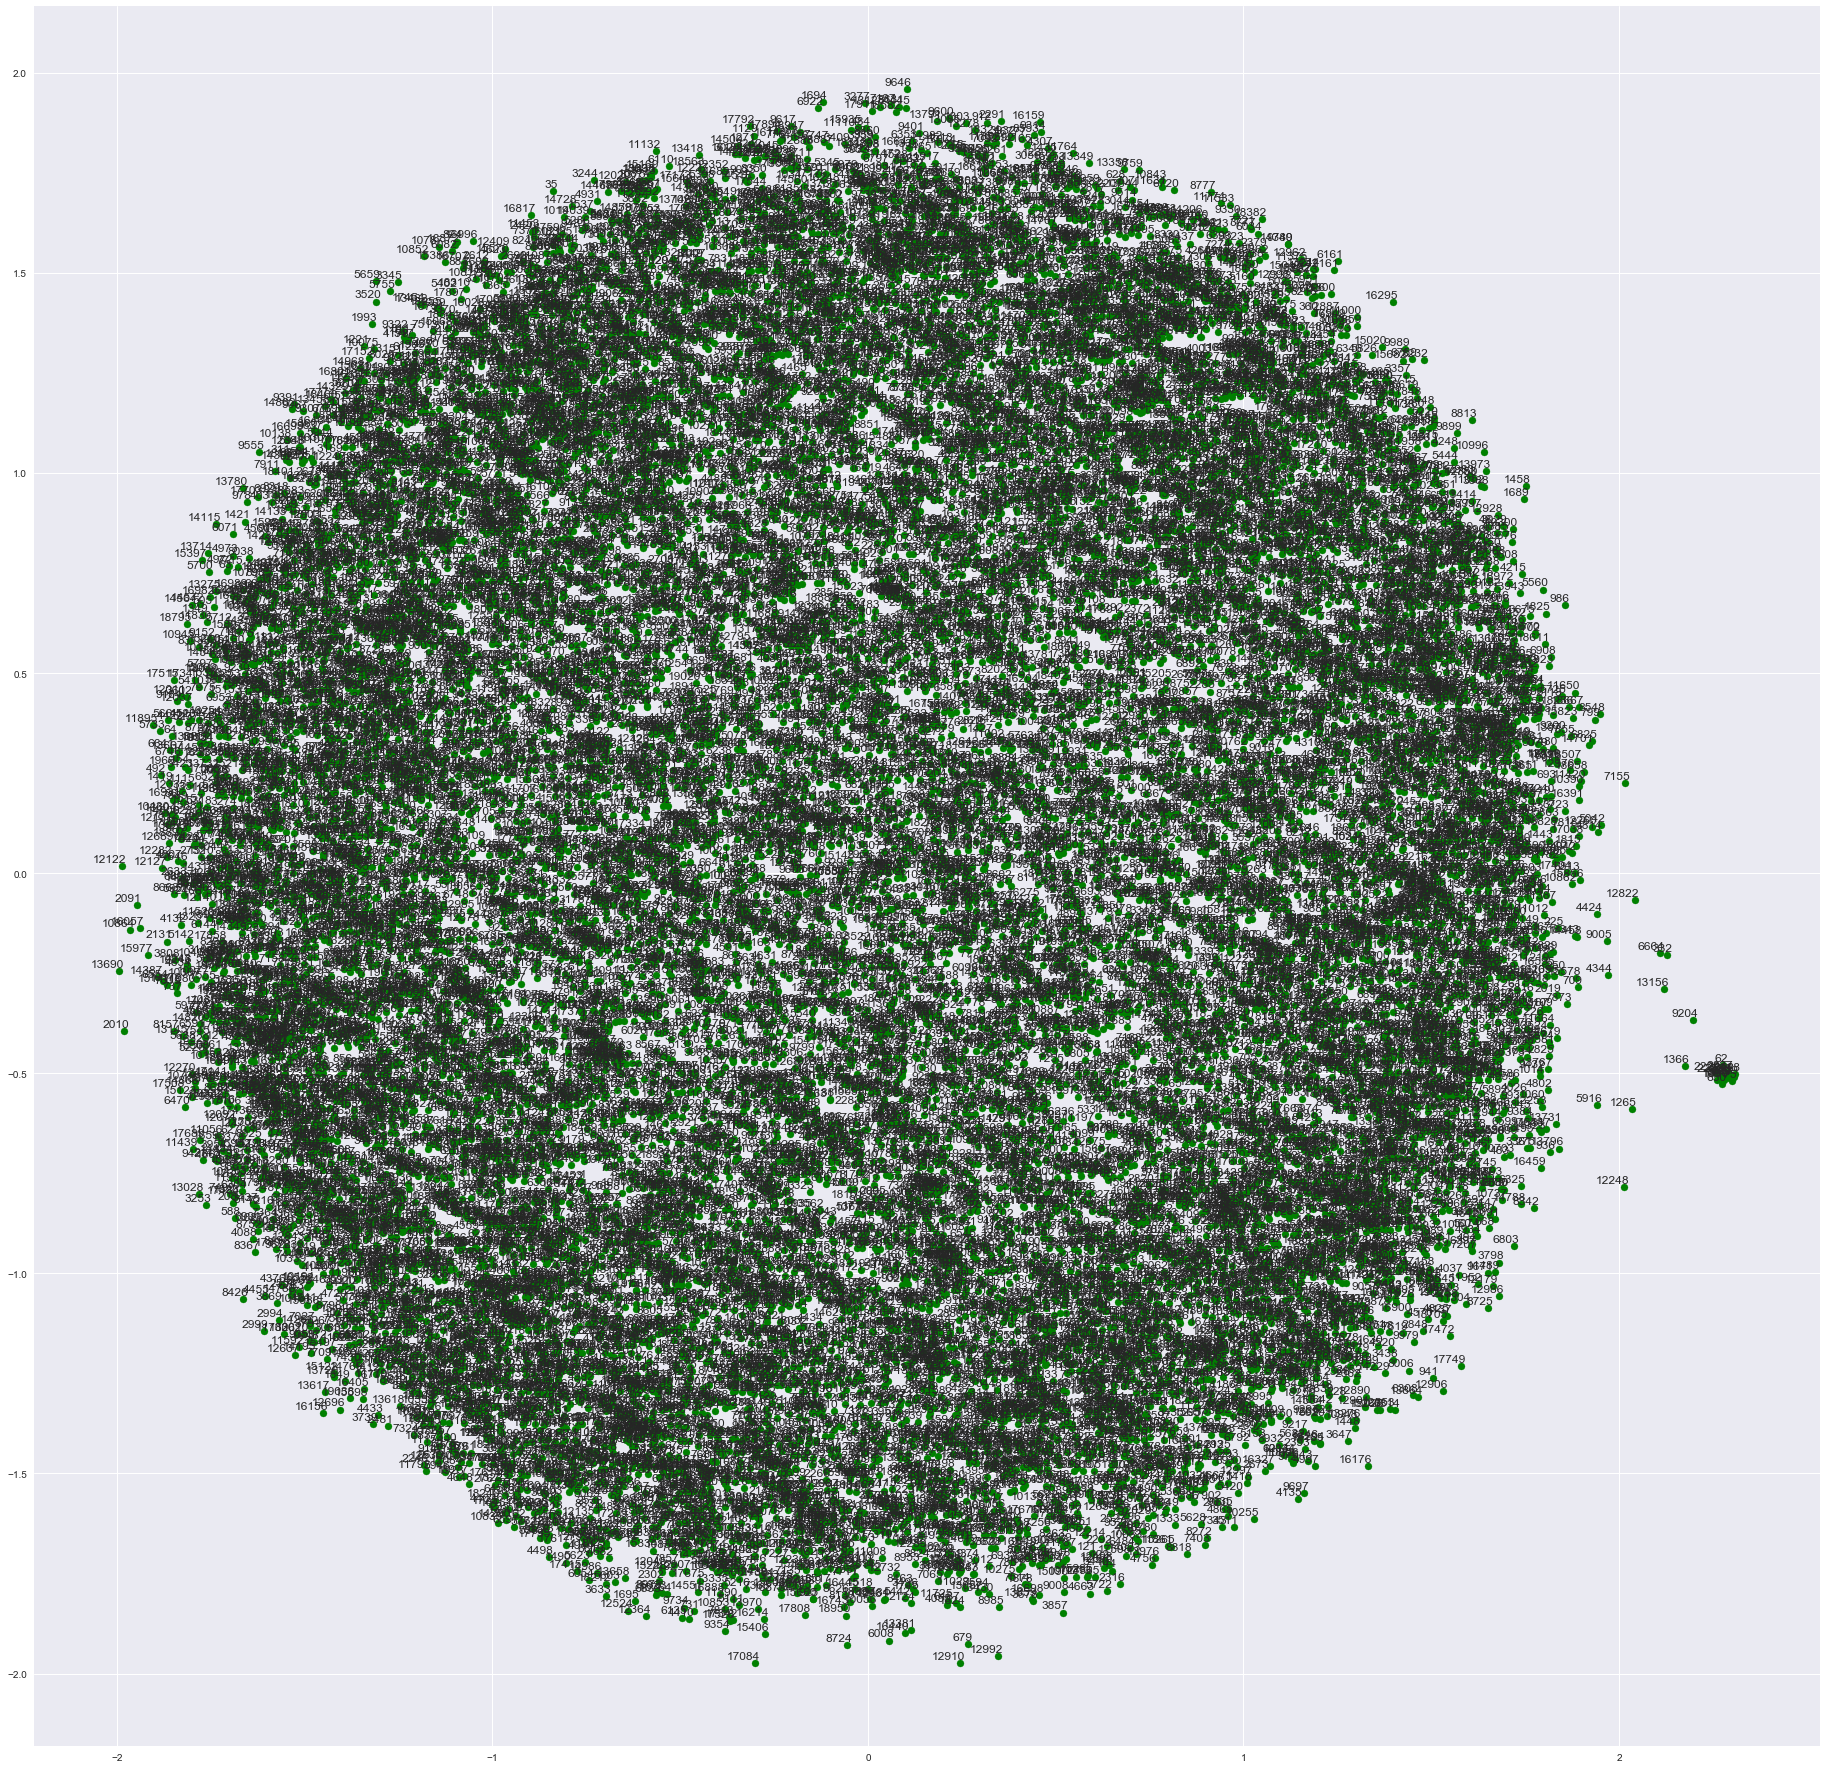

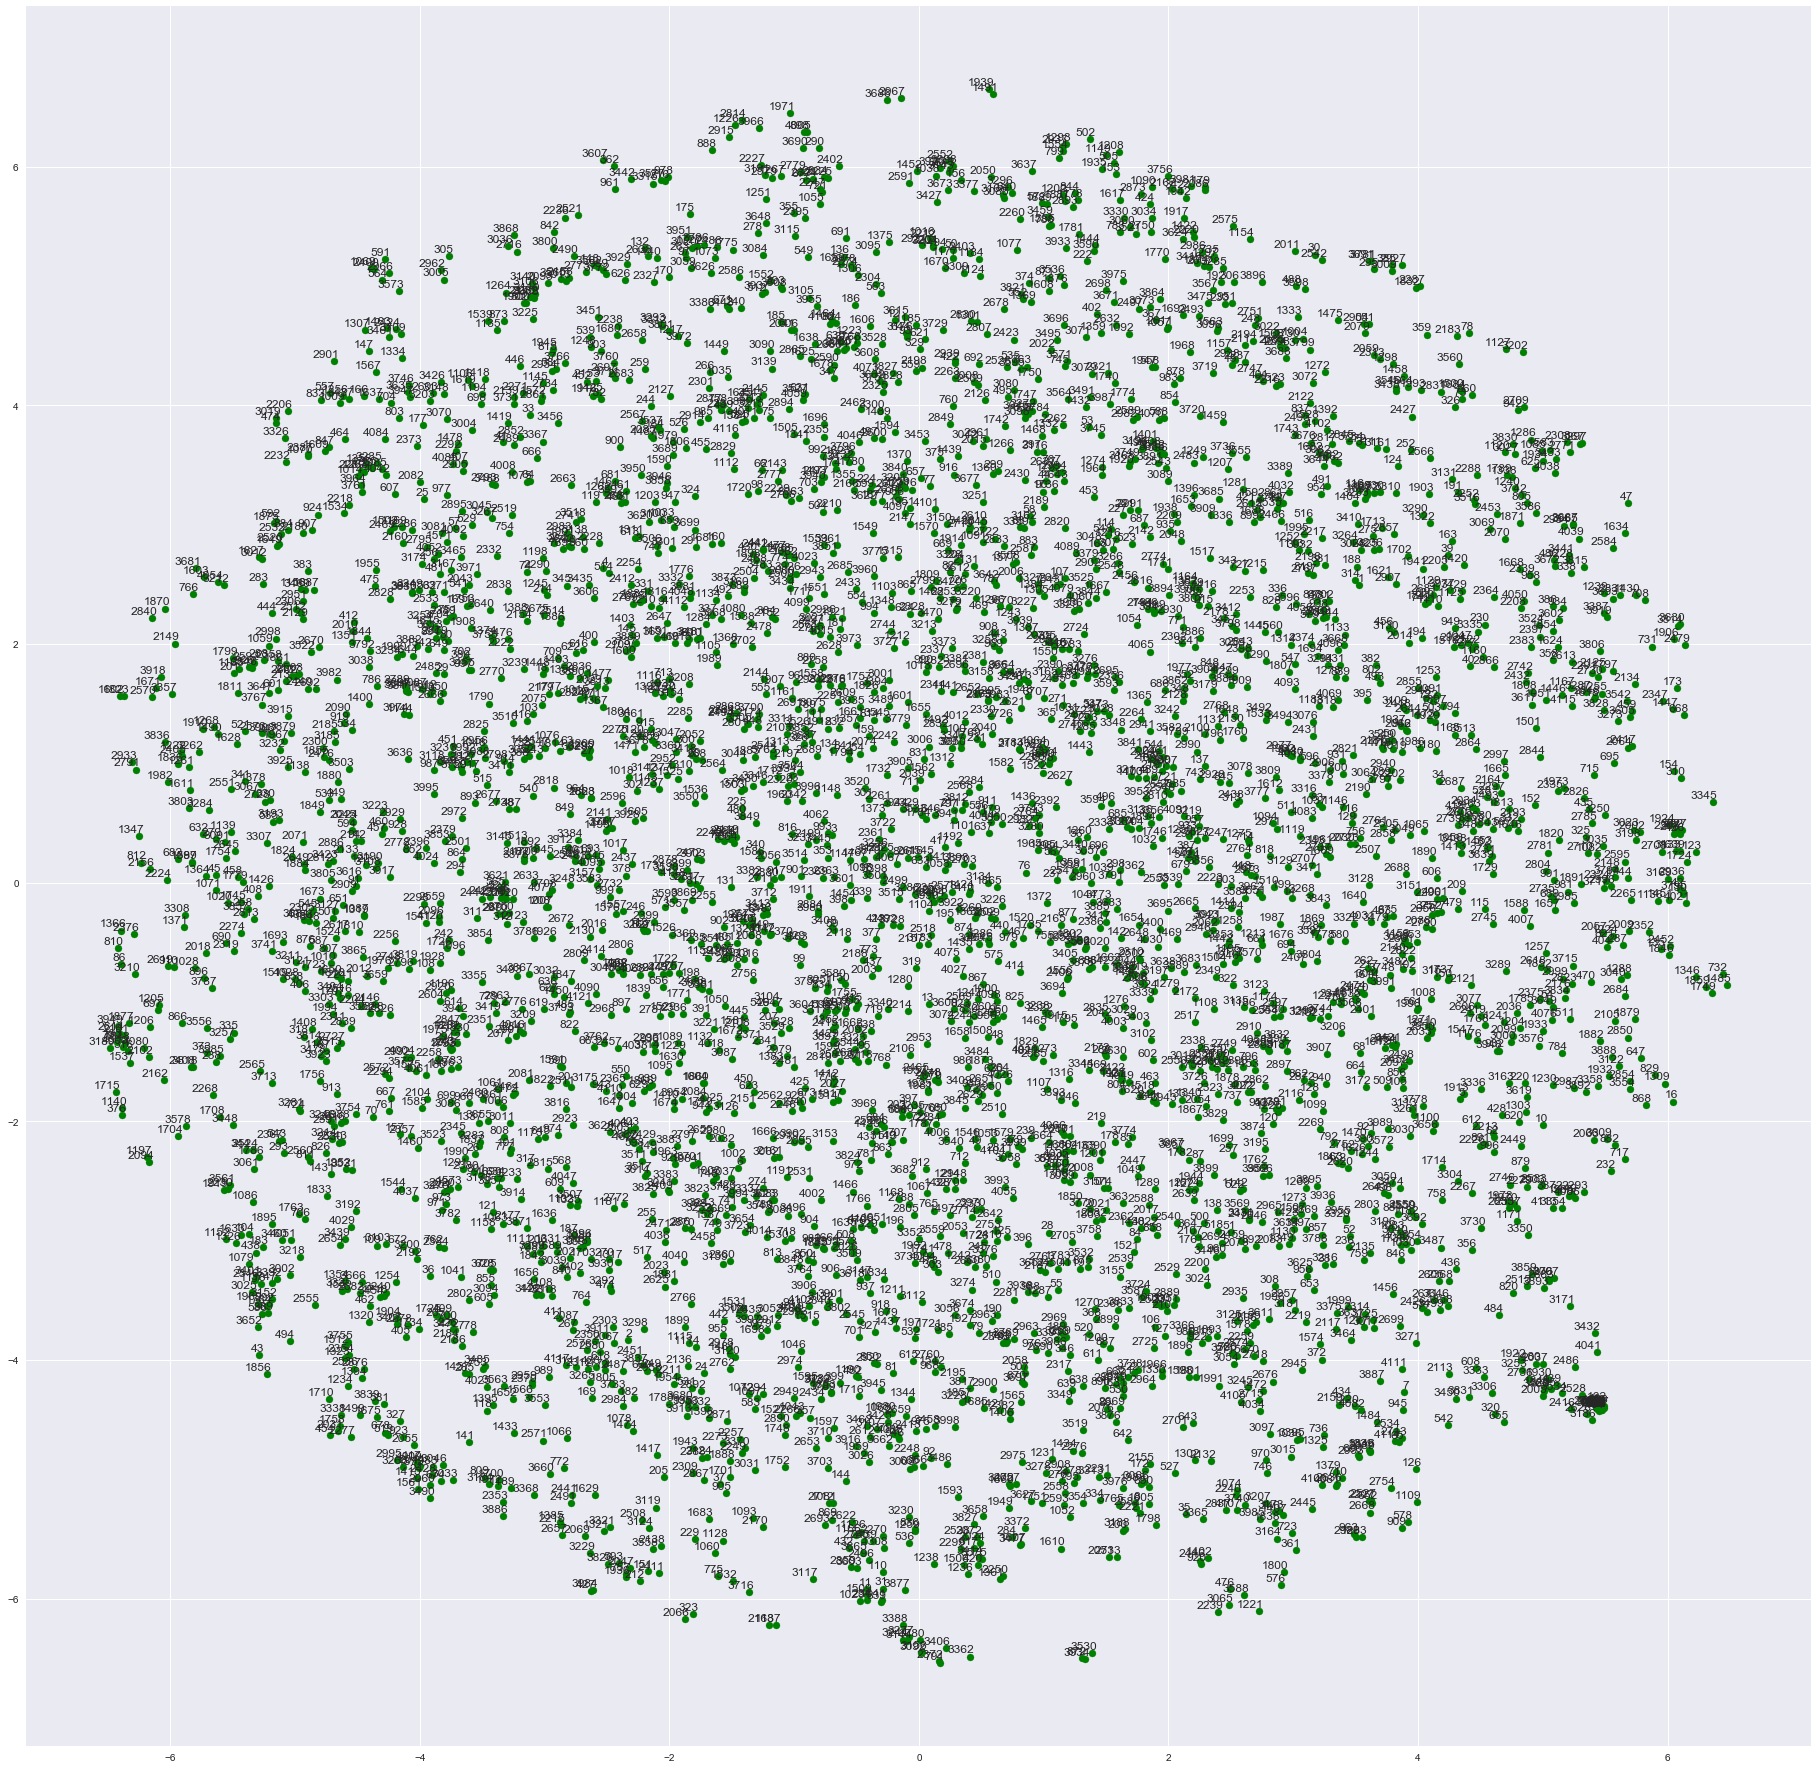

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
sns.set()

embed = TSNE(n_components = 2).fit_transform(vectors)
plt.figure(figsize = (32, 32))

for i, label in enumerate(reverse_dictionary):
    x, y = embed[i, :]
    plt.scatter(x, y, c = 'g')
    plt.annotate(label, xy = (x, y), xytext = (5, 2), textcoords = 'offset points', ha = 'right', va = 'bottom')

plt.show()


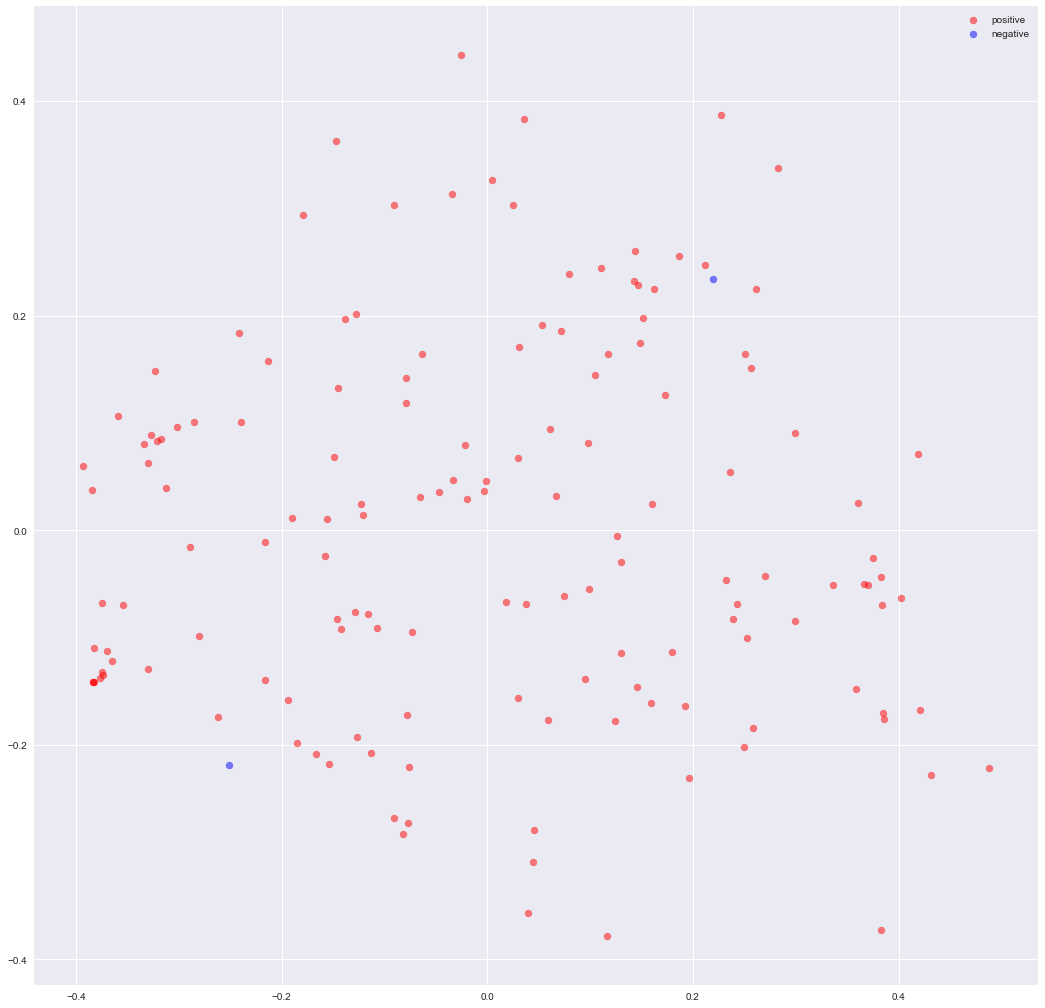

In [46]:
bagofword = np.zeros((len(data), len(vocab)))
for i in range(len(data)):
    for _, text in enumerate(data[i].split()):
        bagofword[i, vocab.index(text)] += 1.0
        
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

bagofword = Normalizer().fit_transform(bagofword)
data_visual = PCA(n_components = 2).fit_transform(bagofword)
palette = ['r', 'b']
data_label = ['positive','negative']

plt.figure(figsize = (18, 18))
for no, _ in enumerate(np.unique(label_encode)):
    plt.scatter(data_visual[label_encode == no, 0], data_visual[label_encode == no, 1], c = palette[no], label = data_label[no], alpha = 0.5)
    
plt.legend()
plt.show()

In [33]:
for no, _ in enumerate(np.unique(label_encode)):
    print (no)
    

0
1


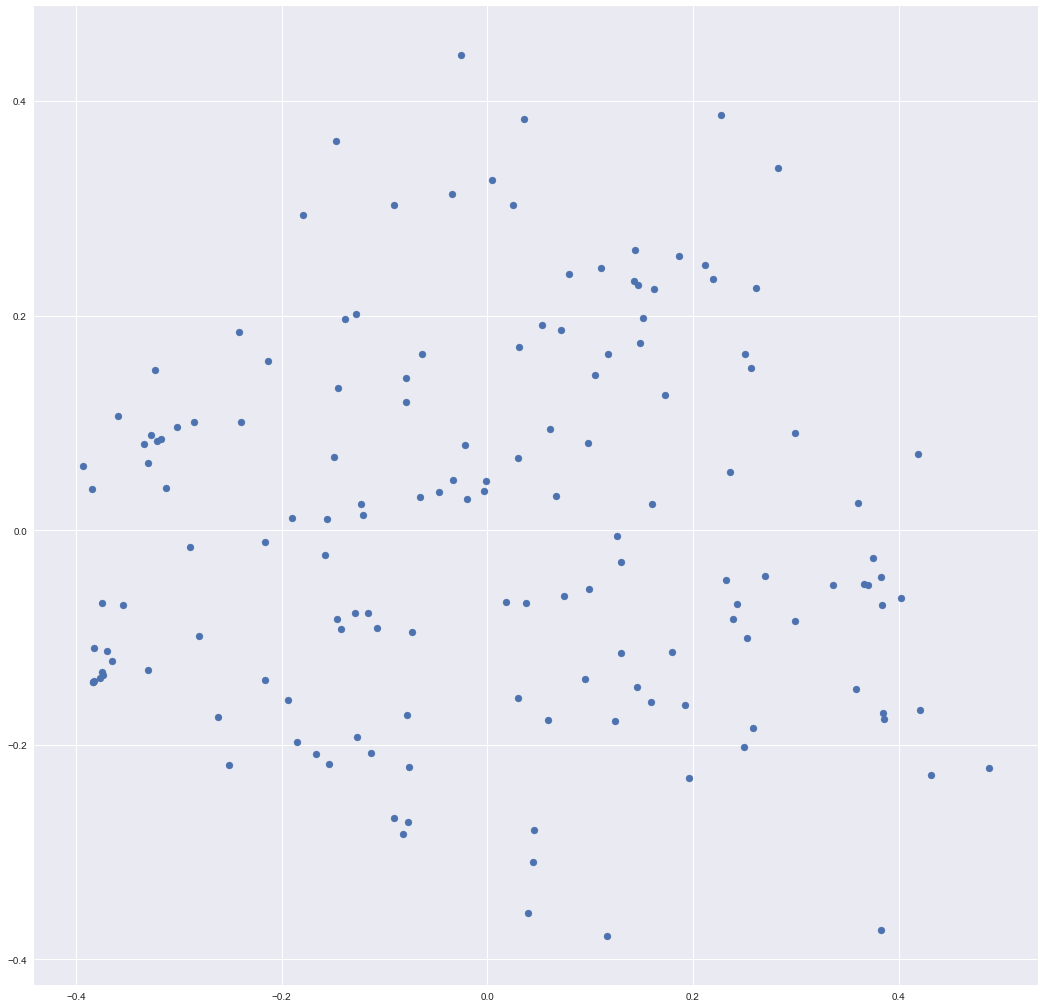

In [40]:
plt.figure(figsize = (18,18))
plt.scatter(data_visual[:,0], data_visual[:,1])
# plt.legend()
plt.show()

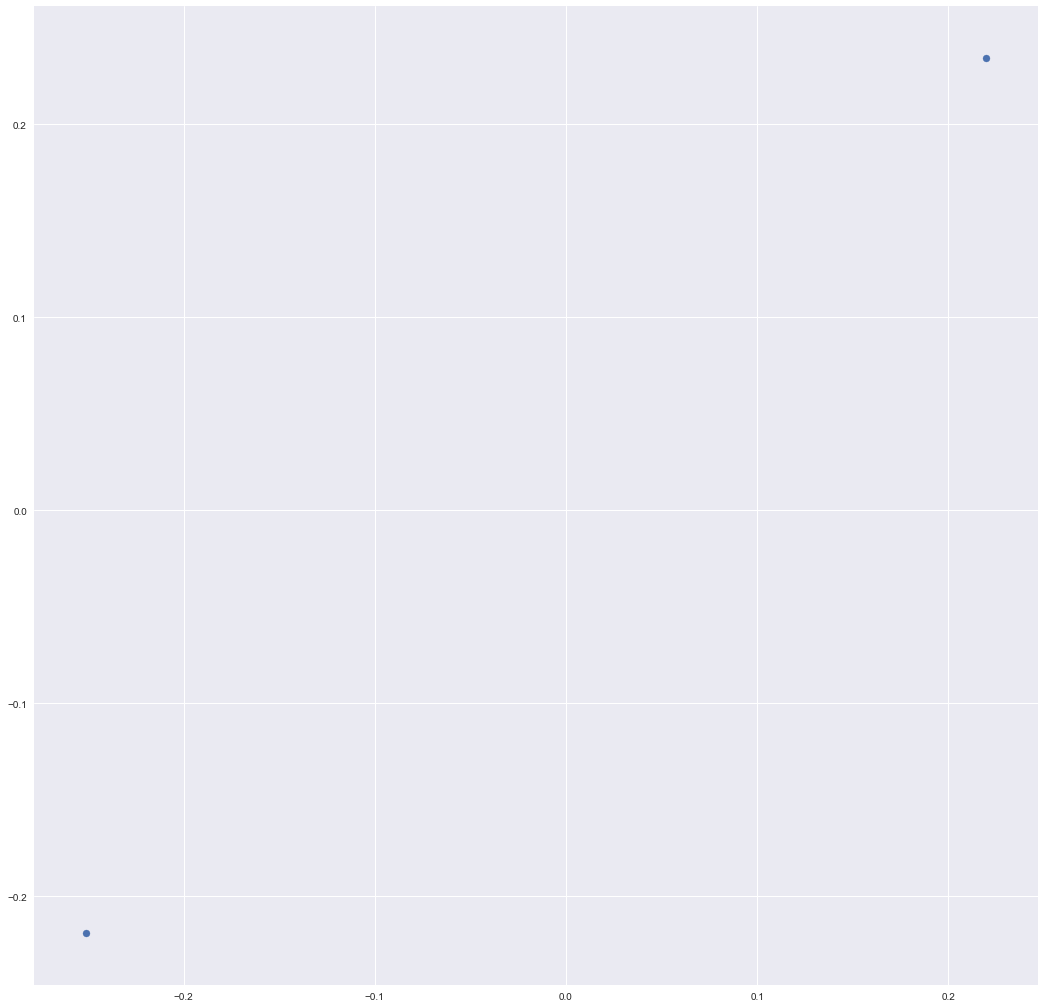

In [43]:
plt.figure(figsize = (18,18))
plt.scatter(data_visual[label_encode == 1, 0], data_visual[label_encode == 1, 1])
plt.show()

In [44]:
type(data_visual)

numpy.ndarray